In [1]:
import os
import sys

import pandas as pd
import numpy as np
import math

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(1,4) # [,1,2]
    for i in pq_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,0,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, 0, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: %6.5f | order: %s'%(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [3]:
df = pd.read_csv("AlphaMergedV2.csv")  

df2 = df[df['name'] == 'RRC']
close = df2.close
time = df2.timestamp
df2 = pd.concat([close, time], axis = 1)

df2.set_index('timestamp', inplace = True)
close = df2.iloc[::-1]
close.head()

,close
timestamp,
1998-01-23,15.19
1998-01-26,15.19
1998-01-27,15.25
1998-01-28,15.63
1998-01-29,16.19


In [4]:
# log returns
lrets = np.log(close['close']/close['close'].shift(1)).fillna(0)
lrets.head()

timestamp
1998-01-23    0.000000
1998-01-26    0.000000
1998-01-27    0.003942
1998-01-28    0.024613
1998-01-29    0.035202
Name: close, dtype: float64

In [5]:
print(lrets[5268:5270])  # 2019 Jan starts from index 5269, ends at index 5289, step 21

print(lrets[5290:5292])   # 2019 Feb starts from index 5290, ends at index 5308, step 19

print(lrets[5309:5311])   # 2019 Mar starts from index 5309, ends at index 5329, step 21
print(lrets[5329:5331])  

timestamp
2018-12-31   -0.007288
2019-01-02    0.039944
Name: close, dtype: float64
timestamp
2019-02-01   -0.007279
2019-02-04   -0.005495
Name: close, dtype: float64
timestamp
2019-03-01    0.022182
2019-03-04    0.017218
Name: close, dtype: float64
timestamp
2019-03-29    0.002673
2019-04-01   -0.008937
Name: close, dtype: float64


In [6]:
JanS = 5269
JanE = 5289

FebS = 5290
FebE = 5308

MarS = 5309
MarE = 5329

# Jan

In [20]:
# predict for 2019 Jan
TS1 = lrets[1:JanS]    # change index

res_tup = _get_best_model(TS1)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=21, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -20685.86991 | order: (2, 0, 2)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,...,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686


In [23]:
preJan = 0*lrets[JanS:JanE+1]
for d in range(len(preJan)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preJan.iloc[d] = out.mean[colname].iloc[-1]

In [24]:
retsJan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
retsJan['Real value'] = lrets[JanS:JanE+1]
retsJan['Prediction'] = preJan 

Jan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
Jan['Real value']=retsJan['Real value'].cumsum()
Jan['Prediction'] = retsJan['Prediction'].cumsum()

JanReverse = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
JanReverse['Real value'] = Jan['Real value'] + np.log(close[JanS - 1:JanS])['close'].iloc[0] # add log of real value of 2018/12/31
JanReverse['Prediction'] = Jan['Prediction'] + np.log(close[JanS - 1:JanS])['close'].iloc[0]

for d in range(len(preJan)):
    JanReverse['Real value'].iloc[d] = math.exp( JanReverse['Real value'].iloc[d] )  # reverse log
    JanReverse['Prediction'].iloc[d] = math.exp( JanReverse['Prediction'].iloc[d] )
    
JanReverse

,Real value,Prediction
timestamp,,
2019-01-02,9.96,9.624571
2019-01-03,9.95,9.679453
2019-01-04,10.69,9.734648
2019-01-07,11.13,9.790157
2019-01-08,11.00,9.845984
2019-01-09,11.60,9.902128
2019-01-10,11.44,9.958593
2019-01-11,11.50,10.015380
2019-01-14,11.87,10.072490


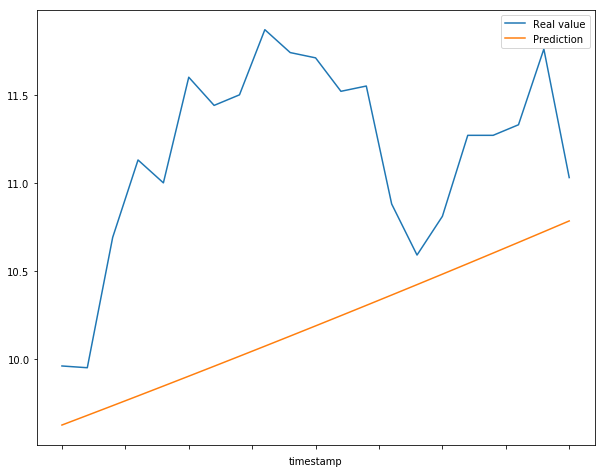

In [25]:
JanReverse['Real value'].plot(figsize=(10,8))
JanReverse['Prediction'].plot()
plt.legend()
plt.show()

# Feb

In [26]:
# predict for 2019 Feb
TS2 = lrets[1:FebS]    # change index

res_tup = _get_best_model(TS2)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=19, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -20768.28785 | order: (2, 0, 2)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287,-0.065287


In [27]:
preFeb = 0*lrets[FebS:FebE+1]
for d in range(len(preFeb)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preFeb.iloc[d] = out.mean[colname].iloc[-1]

In [28]:
retsFeb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
retsFeb['Real value'] = lrets[FebS:FebE+1]
retsFeb['Prediction'] = preFeb

Feb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
Feb['Real value']=retsFeb['Real value'].cumsum()
Feb['Prediction'] = retsFeb['Prediction'].cumsum()

FebReverse = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
FebReverse['Real value'] = Feb['Real value'] + np.log(close[FebS-1:FebS])['close'].iloc[0] # add log of real value at 2018/12/31
FebReverse['Prediction'] = Feb['Prediction'] + np.log(close[FebS-1:FebS])['close'].iloc[0]

for d in range(len(preFeb)):
    FebReverse['Real value'].iloc[d] = math.exp( FebReverse['Real value'].iloc[d] )  # reverse log
    FebReverse['Prediction'].iloc[d] = math.exp( FebReverse['Prediction'].iloc[d] )
    
FebReverse

,Real value,Prediction
timestamp,,
2019-02-01,10.95,10.332888
2019-02-04,10.89,9.679834
2019-02-05,10.72,9.068054
2019-02-06,10.14,8.494940
2019-02-07,9.66,7.958047
2019-02-08,9.44,7.455087
2019-02-11,10.35,6.983914
2019-02-12,10.41,6.542521
2019-02-13,10.39,6.129024


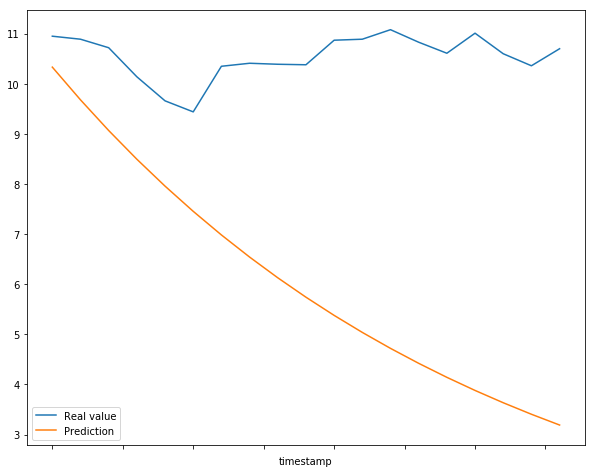

In [29]:
FebReverse['Real value'].plot(figsize=(10,8))
FebReverse['Prediction'].plot()
plt.legend()
plt.show()

# Mar

In [30]:
# predict for 2019 Mar
TS3 = lrets[1:MarS-1]    # change index

res_tup = _get_best_model(TS3)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=22, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -20837.95360 | order: (3, 0, 2)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21,h.22
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-27,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,...,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274


In [31]:
preMar = 0*lrets[MarS:MarE+1]
for d in range(len(preMar)):
    if d+1 < 9:
        colname = 'h.0' + str(d+1+1)
    else:
        colname = 'h.' + str(d+1+1)    
    preMar.iloc[d] = out.mean[colname].iloc[-1]

In [32]:
retsMar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
retsMar['Real value'] = lrets[MarS:MarE+1]
retsMar['Prediction'] = preMar 

Mar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
Mar['Real value']=retsMar['Real value'].cumsum()
Mar['Prediction'] = retsMar['Prediction'].cumsum()

MarReverse = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
MarReverse['Real value'] = Mar['Real value'] + np.log(close[MarS-1:MarS])['close'].iloc[0] # add log of real value at 2018/12/31
MarReverse['Prediction'] = Mar['Prediction'] + np.log(close[MarS-1:MarS])['close'].iloc[0]

for d in range(len(preMar)):
    MarReverse['Real value'].iloc[d] = math.exp( MarReverse['Real value'].iloc[d] )  # reverse log
    MarReverse['Prediction'].iloc[d] = math.exp( MarReverse['Prediction'].iloc[d] )
    
MarReverse

,Real value,Prediction
timestamp,,
2019-03-01,10.94,10.702929
2019-03-04,11.13,10.705860
2019-03-05,10.95,10.708791
2019-03-06,10.60,10.711723
2019-03-07,10.32,10.714655
2019-03-08,9.79,10.717589
2019-03-11,9.85,10.720523
2019-03-12,10.39,10.723458
2019-03-13,10.81,10.726394


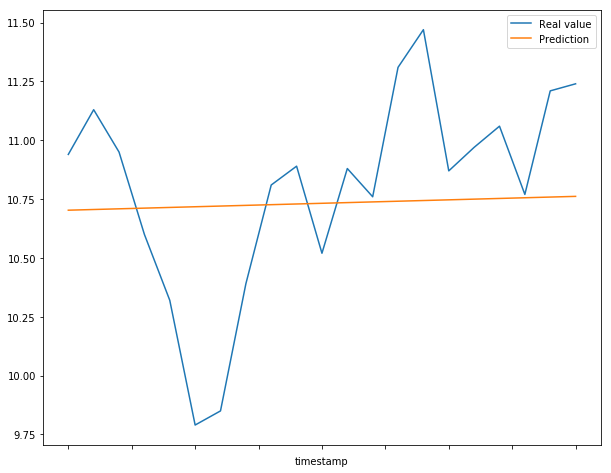

In [33]:
MarReverse['Real value'].plot(figsize=(10,8))
MarReverse['Prediction'].plot()
plt.legend()
plt.show()

# Combine Dataframes of 3 months

In [34]:
RRC = pd.concat([JanReverse, FebReverse, MarReverse])
RRC.columns = ['RRC real value', 'RRC prediction']
RRC.to_csv('RRC_pred.csv')